# Exploratory Data Analysis - Gabrielle Nyirjesy
## Data Import and Initial Analysis

In [20]:
# Read in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
#Read in data
profile = pd.read_csv("../../data/profileData.csv")
profile.head()

,float,cycleNumber,date,PRES,PSAL,TEMP,BBP700,CHLA
0,1902303,1,2021-05-06 02:03:16,3,35.539001,12.378333,0.001788,0.695875
1,1902303,1,2021-05-06 02:03:16,4,35.539001,12.378333,0.001788,0.695875
2,1902303,1,2021-05-06 02:03:16,6,35.539001,12.378667,0.001788,0.696499
3,1902303,1,2021-05-06 02:03:16,8,35.539001,12.379000,0.001789,0.716489
4,1902303,1,2021-05-06 02:03:16,10,35.539001,12.379000,0.001790,0.715552


In [5]:
satData = pd.read_csv("../../data/satData.csv")
satData.head()

,float,cycleNumber,date,latitude,longitude,elevation,MO_SAT_SST,MO_SAT_CHL,MO_SAT_BBP,LT_SAT_SST_SD,LT_SAT_SST_MED,LT_SAT_CHL_SD,LT_SAT_CHL_MED,LT_SAT_BBP_SD,LT_SAT_BBP_MED
0,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.003340,2.156995,12.796509,0.253809,0.401662,0.000819,0.002213
1,1902303,2,2021-05-06 19:32:57,49.096,-14.617,-4612.0,12.466026,0.782180,0.003081,2.214400,12.673785,0.222806,0.398969,0.000793,0.002114
2,1902303,3,2021-05-07 20:05:38,48.914,-14.606,-4700.0,12.424099,0.458020,0.003185,2.211703,12.808284,0.279028,0.428079,0.000752,0.002105
3,1902303,4,2021-05-08 22:42:52,48.794,-14.689,-4753.0,12.374519,0.378064,0.001767,2.200517,13.010804,0.278832,0.422287,0.000679,0.002087
4,1902303,5,2021-05-09 20:29:00,48.719,-14.795,-4765.0,12.204494,0.411479,0.001677,2.232417,12.931680,0.334429,0.419105,0.000776,0.002090


In [6]:
globalFloatData = pd.read_csv("../../data/globalFloatData.csv")
globalFloatData.head()

,float,date,latitude,longitude
0,1902303,2021-05-06 02:03:16,49.236,-14.742
1,1902303,2021-05-06 19:32:57,49.096,-14.617
2,1902303,2021-05-07 20:05:38,48.914,-14.606
3,1902303,2021-05-08 22:42:52,48.794,-14.689
4,1902303,2021-05-09 20:29:00,48.719,-14.795


In [7]:
df_2902120 = pd.read_csv("../../data/2902120.csv")
df_2902120.head()


,date,date_adj,basin,float,cycleNumber,longitude,latitude,elevation,shift,PRES,...,DOXY,PSAL,TEMP,jDay,timeseries,floatID,minJday,maxJday,maxDiff,perCoastal
0,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,1,...,204.074387,36.477667,27.612666,69,1,2902120_1,69,359,10,0
1,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,10,...,204.189794,36.485334,27.246667,69,1,2902120_1,69,359,10,0
2,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,102,...,33.288569,35.854167,23.052499,69,1,2902120_1,69,359,10,0
3,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,103,...,28.155571,35.837334,22.889666,69,1,2902120_1,69,359,10,0
4,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,108,...,23.022574,35.773333,22.395333,69,1,2902120_1,69,359,10,0


In [8]:
df_2902120_interp = pd.read_csv("../../data/2902120_interp.csv")
df_2902120_interp.head()

,jDay,PRES,CHLA
0,1,0,0.546405
1,1,1,0.546405
2,1,2,0.546405
3,1,3,0.546405
4,1,4,0.546405


### Connections

In [9]:
df_2902120.shape

(29540, 28)

In [10]:
profile.shape

(37469410, 8)

In [11]:
profile['float'].value_counts()[2902120]
#The 2902120 dataset is a subset of the float profiles dataset

29540

### Examine profiles data

In [12]:
#Find the number of floats
profile['float'].nunique()

569

In [13]:
# Does each float encompass the whole time period
print(profile['date'].min())
print(profile['date'].max())

2010-06-01 16:28:06
2022-05-23 11:34:00


In [14]:
profile['float'].value_counts().mean()
#On average, there are 65851 measurements for each flot

65851.33567662566

In [15]:
profile.dtypes

float            int64
cycleNumber      int64
date            object
PRES             int64
PSAL           float64
TEMP           float64
BBP700         float64
CHLA           float64
dtype: object

In [22]:
#convert date column to datetime object
profile['date'] = pd.to_datetime(profile['date'])

In [23]:
profile.dtypes

float                   int64
cycleNumber             int64
date           datetime64[ns]
PRES                    int64
PSAL                  float64
TEMP                  float64
BBP700                float64
CHLA                  float64
dtype: object

In [28]:
profile['year'] = pd.DatetimeIndex(profile['date']).year

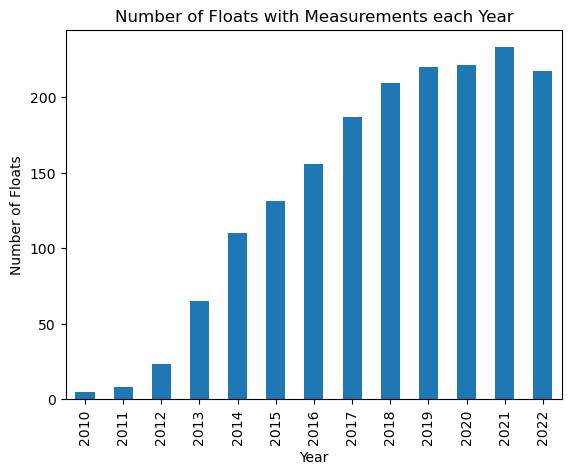

In [66]:
#How many floats have measurements each year?
year_count = profile[['year','float']].groupby('year').nunique()
year_count.plot(kind='bar', legend=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Floats')
_ = plt.title('Number of Floats with Measurements each Year')
plt.show()

In [74]:
profile['float'].value_counts()

3901498    329728
6901183    328520
6902735    323890
6901492    323848
3901531    311602
            ...  
5904764       508
2902113       497
5905074       488
2902161       281
6900877        51
Name: float, Length: 569, dtype: int64

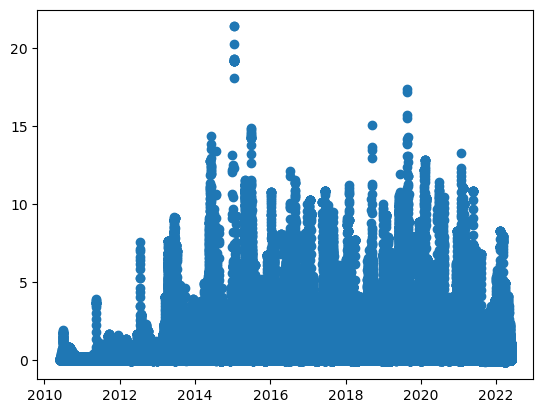

In [75]:
plt.scatter(profile['date'],profile['CHLA'])

In [94]:
profile_subset = profile[profile['float'].isin(list(profile['float'].value_counts().reset_index()['index'][0:1]))]

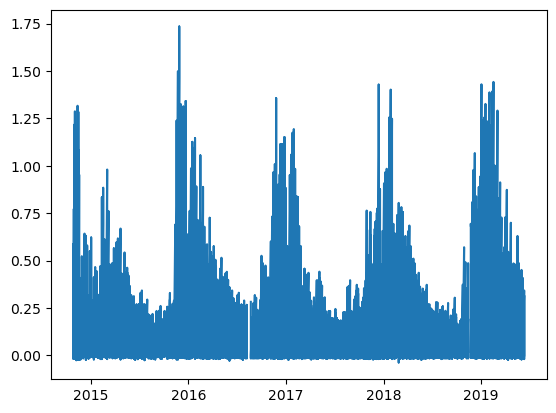

In [98]:
plt.plot(profile_subset['date'],profile_subset['CHLA'])

## Seasonality & Time Series